In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt# Actualizar los datos (URL)
%matplotlib inline

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url).fillna(0)
df= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
df=df[['date','total_cases','total_deaths','location']]
x=np.arange(1,len(df)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(df.values[:,1])
y1=np.array(df.values[:,2])
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df


,date,total_cases,total_deaths,location
15939,60,6.0,0.0,Ecuador
15940,61,6.0,0.0,Ecuador
15941,62,7.0,0.0,Ecuador
15942,63,10.0,0.0,Ecuador
15943,64,13.0,0.0,Ecuador
15944,65,13.0,0.0,Ecuador
15945,66,13.0,0.0,Ecuador
15946,67,14.0,0.0,Ecuador
15947,68,15.0,0.0,Ecuador
15948,69,15.0,0.0,Ecuador


           4            3         2
7.117e-06 x - 0.007754 x + 3.453 x + 206.6 x - 3866


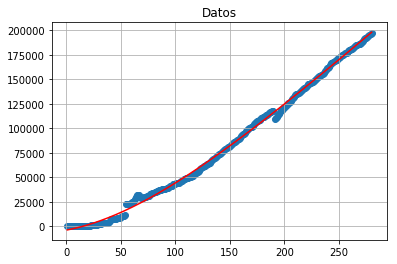

In [6]:
x=np.arange(1,len(df)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(df.values[:,1], dtype='float')
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.title('Datos');
plt.grid(True)
plt.scatter(x, y)  
plt.plot(x, fun1(x), c='r')  
plt.show()

           4            3         2
7.117e-06 x - 0.007754 x + 3.453 x + 206.6 x - 3866


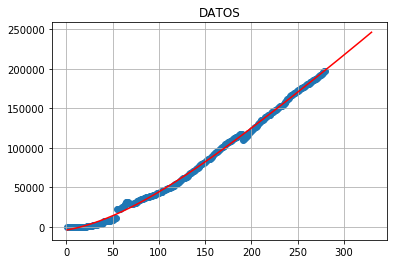

In [7]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.title('DATOS');
plt.grid(True)
plt.scatter(x, y) 
x1=np.arange(1,len(df)+51,1, dtype='float')
plt.plot(x1, fun1(x1), c='r')  
plt.show()

Mediana 73697.5
Media 81849.32857142857
271088


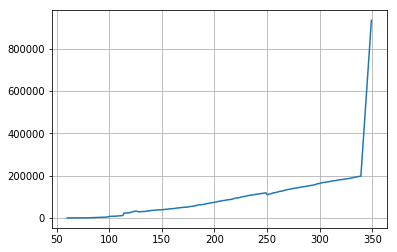

In [8]:
filtro = df["total_cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('Mediana', mediana)
print('Media', media)
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)
for it in range(int(x[-1]), int(x[-1]+10)):
    x=np.append(x,(it+1))
    y=np.append(y,y[-1] + mediana)
plt.plot(x,y)
plt.grid(True)
plt.show()